## TensorFlow 2.0부터는 Keras가 TensorFlow의 공식 API로 통합. - TensorFlow를 사용하여 Keras 모델을 구성하는 방법

### Sequential 모델
Sequential 모델은 Keras에서 제공하는 가장 간단한 모델 구성 방법. Sequential 모델은 레이어를 순차적으로 쌓아 나가는 방식으로 모델을 구성. 각 레이어는 이전 레이어의 출력을 입력으로 받는다.하나의 입력과 하나의 출력을 가지는 단일 흐름의 모델을 만들기에 적합
- TensorFlow와 Keras 가져오기:
- Sequential 모델 생성:
Sequential 모델은 레이어를 선형으로 쌓아서 만드는 가장 간단한 모델입니다.
- 레이어 추가:
모델에 레이어를 추가하여 모델의 구조를 정의합니다. Keras에서는 다양한 유형의 레이어를 제공합니다. 예를 들어, Dense(완전 연결 레이어), Conv2D(2D 컨볼루션 레이어), LSTM(장기 단기 메모리 레이어) 등이 있습니다.
- 모델 컴파일:
모델의 구조를 정의한 후에는 컴파일 단계에서 손실 함수, 최적화 알고리즘 및 성능 지표를 지정해야 합니다.
- 모델 요약 정보 출력:
- 모델 학습:
- 모델 예측:
- 모델 저장 및 로드:

### Functional API

Functional API는 복잡한 모델 구조를 지원하며, 다양한 연결 및 분기 구조를 갖는 네트워크를 생성하는 데 유용

- TensorFlow와 필요한 모듈 가져오기:
- 입력 레이어 정의:
모델의 입력 레이어를 정의합니다.
- 레이어 구성:
다양한 레이어를 사용하여 모델의 구조를 정의합니다. 각 레이어는 이전 레이어의 출력을 입력으로 받습니다.
- 모델 생성:
입력과 출력을 지정하여 모델을 생성합니다.
- 모델 컴파일:
모델의 구조를 정의한 후에는 컴파일 단계에서 손실 함수, 최적화 알고리즘 및 성능 지표를 지정해야 합니다.
- 모델 요약 정보 출력:
- 모델 학습:
훈련 데이터를 사용하여 모델을 학습시킵니다. 입력 데이터와 해당 출력 데이터를 제공해야 합니다.
- 모델 예측:
- 모델 저장 및 로드:

In [69]:
# Sequential 방식
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()

model.add(keras.layers.Dense(units=64, activation='relu', input_shape=(input_dim,))) #<- 입력층 . units=출력수
model.add(keras.layers.Dense(units=32, activation='relu')) #<- 중간층 (은닉층)
model.add(keras.layers.Dense(units=10, activation='softmax')) # <- 출력층

# 최적화 대상은 loss.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])# 어떻게 학습할지 가이드하는부분

model.summary()# 학습한 내용을 요약해서 출력해준다

model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))#validation_data=검증용 데이터

predictions = model.predict(x_test)# 평가

model.save('my_model.h5')  # 모델 저장
loaded_model = keras.models.load_model('my_model.h5')  # 모델 로드

NameError: ignored

In [14]:
# 함수 방식
import tensorflow as tf
from tensorflow import keras

inputs = keras.Input(shape=(input_dim,))

x = keras.layers.Dense(units=64, activation='relu')(inputs)
x = keras.layers.Dense(units=32, activation='relu')(x)
outputs = keras.layers.Dense(units=10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

predictions = model.predict(x_test)

model.save('my_model.h5')  # 모델 저장
loaded_model = keras.models.load_model('my_model.h5')  # 모델 로드

NameError: ignored

In [15]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [16]:
train_data.shape

(25000,)

In [17]:
len(train_data[0]) #0번째에는 단어를 218개 사용했음.= 리뷰의 글자수가 다 다름.

218

In [18]:
train_data[0][:5] # 단어의 인덱스 번호 5개 출력.

[1, 14, 22, 16, 43]

In [19]:
import numpy as np
np.max(train_data[0])

7486

In [20]:
train_labels[0]

1

In [21]:
# 시퀀스(인덱스 넘버)의 최대값
max([max(sequence) for sequence in train_data])
# 가장 큰 값 ([가장 큰 값들을 입력으로 갖는 리스트 중에서])

9999

데이터 준비


정수 시퀀스를 멀티 - 핫 인코딩으로 인코딩 하기

In [22]:
# 틀을 만든다
results = np.zeros((len(train_data),10000))
for i, sequence in enumerate(train_data[0]):
  print(i,sequence)

0 1
1 14
2 22
3 16
4 43
5 530
6 973
7 1622
8 1385
9 65
10 458
11 4468
12 66
13 3941
14 4
15 173
16 36
17 256
18 5
19 25
20 100
21 43
22 838
23 112
24 50
25 670
26 2
27 9
28 35
29 480
30 284
31 5
32 150
33 4
34 172
35 112
36 167
37 2
38 336
39 385
40 39
41 4
42 172
43 4536
44 1111
45 17
46 546
47 38
48 13
49 447
50 4
51 192
52 50
53 16
54 6
55 147
56 2025
57 19
58 14
59 22
60 4
61 1920
62 4613
63 469
64 4
65 22
66 71
67 87
68 12
69 16
70 43
71 530
72 38
73 76
74 15
75 13
76 1247
77 4
78 22
79 17
80 515
81 17
82 12
83 16
84 626
85 18
86 2
87 5
88 62
89 386
90 12
91 8
92 316
93 8
94 106
95 5
96 4
97 2223
98 5244
99 16
100 480
101 66
102 3785
103 33
104 4
105 130
106 12
107 16
108 38
109 619
110 5
111 25
112 124
113 51
114 36
115 135
116 48
117 25
118 1415
119 33
120 6
121 22
122 12
123 215
124 28
125 77
126 52
127 5
128 14
129 407
130 16
131 82
132 2
133 8
134 4
135 107
136 117
137 5952
138 15
139 256
140 4
141 2
142 7
143 3766
144 5
145 723
146 36
147 71
148 43
149 530
150 476
151 26
152

In [23]:
# i 는 현재 시퀀스의 인덱스,
# j는 시퀀스 내의 정수이며 각 리뷰에서 등장하는 단어의 인텍스 위치에 해당하는 열을 1로 만든다

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences): #입력받은 시퀀스에서 i와 시퀀스를 뽑아낸다.
        for j in sequence:
            results[i, j] = 1. # 숫자가 있는건 1, 아닌건 0으로 변환한다.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [24]:
x_train[0] # 숫자가 있는건 1. 아닌건 0으로 변환된 것 확인

array([0., 1., 1., ..., 0., 0., 0.])

In [25]:
np.sum(x_train[0]) # 1이 120개 있다는 뜻.

120.0

In [26]:
np.sum(x_train[24999])

95.0

In [27]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### 신경망 모델 만들기

In [28]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid") # 2진분류 = "sigmoid"
])

모델 컴파일하기

In [29]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy', # 2진 분류일때는 'binary_crossentropy'사용
              metrics =['accuracy'])

### 훈련 검증하기

검증 세트 준비하기

In [30]:
# 25000개 중에서 1만개는 검증용으로 만듦
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

모델 훈련하기

In [31]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size= 152,
                    validation_data = (x_val, y_val))

Epoch 1/20
99/99 [==============================] - 7s 17ms/step - loss: 0.4018 - accuracy: 0.8343 - val_loss: 0.3297 - val_accuracy: 0.8626
Epoch 2/20
99/99 [==============================] - 1s 8ms/step - loss: 0.2146 - accuracy: 0.9225 - val_loss: 0.2757 - val_accuracy: 0.8880
Epoch 3/20
99/99 [==============================] - 1s 7ms/step - loss: 0.1550 - accuracy: 0.9451 - val_loss: 0.2974 - val_accuracy: 0.8842
Epoch 4/20
99/99 [==============================] - 1s 7ms/step - loss: 0.1144 - accuracy: 0.9613 - val_loss: 0.3481 - val_accuracy: 0.8750
Epoch 5/20
99/99 [==============================] - 1s 7ms/step - loss: 0.0876 - accuracy: 0.9705 - val_loss: 0.3628 - val_accuracy: 0.8808
Epoch 6/20
99/99 [==============================] - 1s 7ms/step - loss: 0.0633 - accuracy: 0.9791 - val_loss: 0.4417 - val_accuracy: 0.8687
Epoch 7/20
99/99 [==============================] - 1s 7ms/step - loss: 0.0436 - accuracy: 0.9870 - val_loss: 0.4664 - val_accuracy: 0.8710
Epoch 8/20
99/99 [=

In [32]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

훈련과 검증 손실 그리기

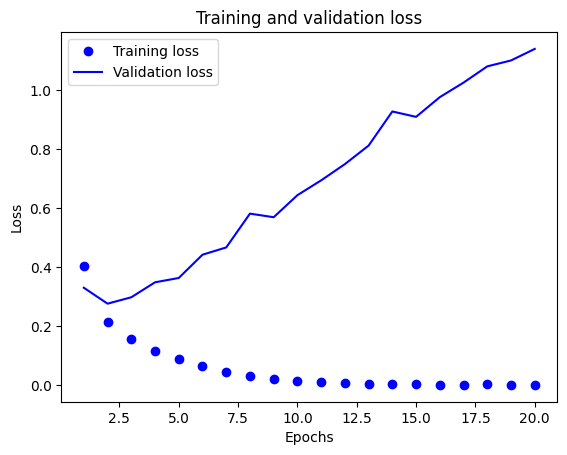

In [33]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1) # len은 20이다. 고로 epoch 는 1~20까지 를 의미한다. +1은 0부터 시작되기 때문
plt.plot(epochs, loss_values, "bo", label="Training loss") # 학습 데이터
plt.plot(epochs, val_loss_values, "b", label="Validation loss") # 검증 데이터
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 중요한건 validation
# validation이 가장 낮은 지점 = 최소화 되는 지점까지만 학습을 한다.
# 현 그래프에서는 epoch 4 정도 위치가 최소화 지점으로 보인다.
# 그 이후에는 다시 상승하므로 더 하는건 손실이다.

훈련과 검증 정확도 그리기

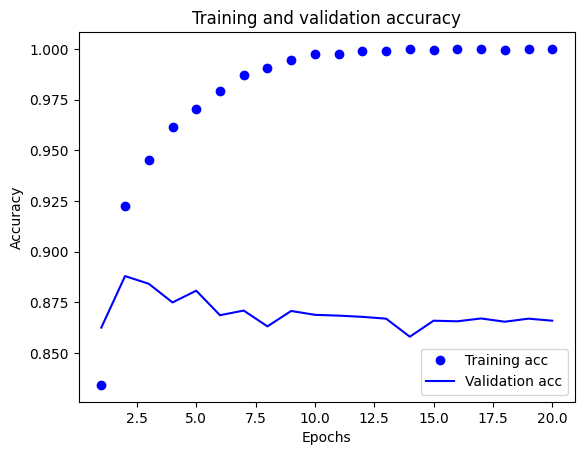

In [34]:
plt.clf() # 현재 활성화된 그림을 지우고 새로운 그림을 그릴 준비를 함.
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

모델 처음부터 다시 훈련하기

In [35]:

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics =['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512) # epochs 를 4만준다
print()
results= model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 11ms/step - loss: 0.5145 - accuracy: 0.8032
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.3076 - accuracy: 0.8962
Epoch 3/4
49/49 [==============================] - 1s 10ms/step - loss: 0.2336 - accuracy: 0.9171
Epoch 4/4
49/49 [==============================] - 0s 10ms/step - loss: 0.1959 - accuracy: 0.9297

782/782 [==============================] - 2s 2ms/step - loss: 0.2787 - accuracy: 0.8869


In [36]:
results
# 첫번째 숫자는 손실(0.29), 두번째 숫자는 테스트 정확도 (0.88) = 파이썬 완벽가이드 522p 에도 같은것이 있다.
# 굳이 이런것에 딥러닝을 사용할 필요는 없긴 함

[0.2787296772003174, 0.8868799805641174]

학습데이터 = 15000개<br>
검증데이터 = 10000개

## 뉴스 기사 분류: 다중 분류 문제

로이터 데이터 셋

In [37]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(
    num_words=10000
)

2110848/2110848 [==============================] - 1s 0us/step


In [38]:
len(train_data)

8982

In [39]:
len(test_data)

2246

In [40]:
train_data[10][:10]

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14]

로이터 데이터셋을 텍스트로 디코딩 하기

In [41]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i-3,"?") for i in train_data[0]])

550378/550378 [==============================] - 0s 1us/step


In [42]:
train_labels[10]

3

## 데이터 준비

In [43]:
# 데이터 인코딩
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [44]:
# 레이블 인코딩 하기

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [45]:
# keras 내장함수
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

## 모델구성

모델 정의하기

In [46]:
model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(46, activation = 'softmax'),
])

모델 컴파일하기

In [47]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

## 훈련 검증

In [48]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [49]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 28ms/step - loss: 2.6542 - accuracy: 0.5155 - val_loss: 1.7992 - val_accuracy: 0.6020
Epoch 2/20
16/16 [==============================] - 0s 13ms/step - loss: 1.5305 - accuracy: 0.6721 - val_loss: 1.4044 - val_accuracy: 0.6930
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.1894 - accuracy: 0.7385 - val_loss: 1.2395 - val_accuracy: 0.7350
Epoch 4/20
16/16 [==============================] - 0s 13ms/step - loss: 0.9797 - accuracy: 0.7904 - val_loss: 1.1217 - val_accuracy: 0.7660
Epoch 5/20
16/16 [==============================] - 0s 13ms/step - loss: 0.8192 - accuracy: 0.8247 - val_loss: 1.0286 - val_accuracy: 0.7860
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6893 - accuracy: 0.8542 - val_loss: 1.0080 - val_accuracy: 0.7640
Epoch 7/20
16/16 [==============================] - 0s 13ms/step - loss: 0.5820 - accuracy: 0.8747 - val_loss: 0.9435 - val_accuracy: 0.7870
Epoch 8/20
16

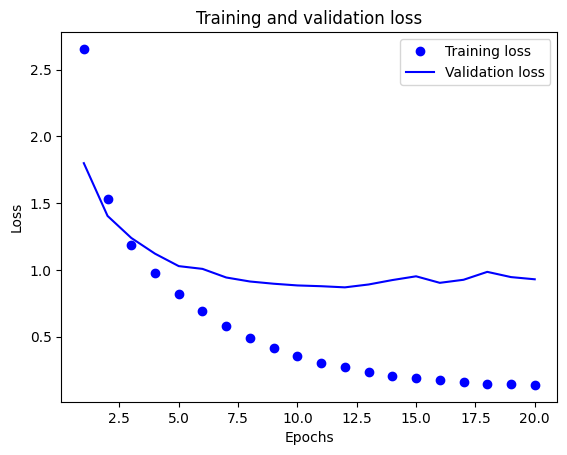

In [50]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

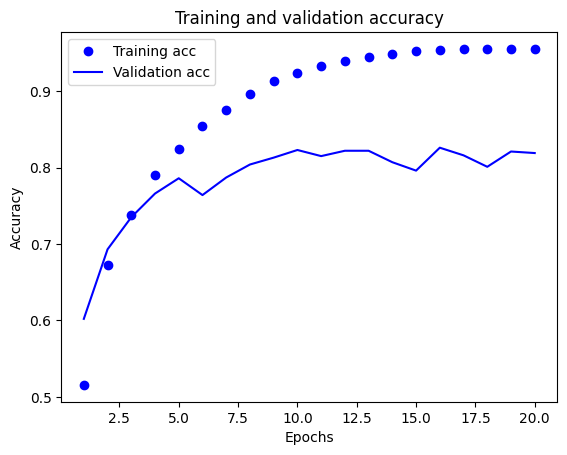

In [51]:
plt.clf() # 현재 활성화된 그림을 지우고 새로운 그림을 그릴 준비를 함.
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [52]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 11ms/step - loss: 2.6459 - accuracy: 0.4368
Epoch 2/9
18/18 [==============================] - 0s 12ms/step - loss: 1.4745 - accuracy: 0.6888
Epoch 3/9
18/18 [==============================] - 0s 11ms/step - loss: 1.1349 - accuracy: 0.7595
Epoch 4/9
18/18 [==============================] - 0s 10ms/step - loss: 0.9286 - accuracy: 0.8002
Epoch 5/9
18/18 [==============================] - 0s 10ms/step - loss: 0.7697 - accuracy: 0.8330
Epoch 6/9
18/18 [==============================] - 0s 11ms/step - loss: 0.6499 - accuracy: 0.8580
Epoch 7/9
18/18 [==============================] - 0s 10ms/step - loss: 0.5426 - accuracy: 0.8829
Epoch 8/9
18/18 [==============================] - 0s 10ms/step - loss: 0.4606 - accuracy: 0.9027
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9111 - accuracy: 0.7943


In [53]:
results
# 정확도 약 80%

[0.9111122488975525, 0.7943009734153748]

In [54]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hist_array = np.array(test_labels) == np.array(test_labels_copy)
hist_array.mean()
# 랜덤으로 하게되면 정확도가 19% 정도밖에 안나옴.
# 2진분류와 멀티분류의 차이가 크다. 그만큼 멀티분류가 어렵다. 0.19정도면 잘 나온 편.

0.19768477292965272

새로운 데이터 예측하기

In [55]:

predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [56]:
predictions[0].shape

(46,)

In [57]:
np.sum(predictions[0])

1.0

In [58]:
np.argmax(predictions[0]) # 샘플에 따라 다를 수 있음.

3

# 레이블과 손실을 다루는 다른 방법

In [59]:
# 레이블 정수 텐서로 변환
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [60]:
model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossntropy',
              metrics=['accuracy'])

In [61]:
# 정보의 병목현상 발생
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"), # 유닛수의 차이가 크면 병목현상이 발생. 출력성능이 떨어진다
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 8ms/step - loss: 2.8696 - accuracy: 0.3171 - val_loss: 2.2603 - val_accuracy: 0.4060
Epoch 2/20
63/63 [==============================] - 0s 5ms/step - loss: 1.9739 - accuracy: 0.4513 - val_loss: 1.7800 - val_accuracy: 0.4730
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 1.5255 - accuracy: 0.5956 - val_loss: 1.4813 - val_accuracy: 0.6340
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 1.2753 - accuracy: 0.6695 - val_loss: 1.3736 - val_accuracy: 0.6610
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 1.1326 - accuracy: 0.7161 - val_loss: 1.3271 - val_accuracy: 0.6940
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 1.0310 - accuracy: 0.7395 - val_loss: 1.3097 - val_accuracy: 0.7000
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 0.9546 - accuracy: 0.7544 - val_loss: 1.3182 - val_accuracy: 0.7030
Epoch 8/20
63/63 [==

- 뉴런은 입력 데이터에서 학습된 가중치와 편향을 사용하여 출력을 계산합니다. units는 해당 레이어의 출력 차원 또는 뉴런의 개수를 결정
- 가중치의 수는 이전 레이어의 units 수와 현재 레이어의 units 수에 따라 결정됩니다. 이전 레이어의 각 뉴런과 현재 레이어의 각 뉴런 사이에 가중치가 존재 하므로, 가중치의 수는 이 연결의 수와 동일
- units 수는 레이어의 출력 차원 또는 뉴런의 개수를 나타내고, 가중치의 수는 모델의 구조와 연결에 따라 결정 됩니다. 가중치의 수는 units수와 일치하지 않을 수 잇습니다.

# 추가 실험

## 주택 가격 예측: 회귀 문제

보스톤 주택 가격 데이터 셋

In [62]:
# 보스턴 주택 데이터셋 로드하기

from tensorflow.keras.datasets import boston_housing
(train_data, train_targets),(test_data, test_targets) = boston_housing.load_data()

In [63]:
train_data.shape

(404, 13)

In [64]:
test_data.shape

(102, 13)

In [65]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

## 데이터 준비

In [66]:
from tensorflow.python.ops.array_ops import strided_slice_eager_fallback
#데이터 정규화 하기

mean = train_data.mean(axis = 0)
train_data -=  mean
std  = train_data.std(axis = 0)
train_data /= std
test_data -=mean
test_data /=std

## 모델 구성

In [67]:
# 모델 정의하기

def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation = 'relu'),
      layers.Dense(64, activation = 'relu'),
      layers.Dense(1)
  ])
  model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
  return model

## K-겹 검증을 사용한 훈련 검증

In [71]:
# K-겹 검증하기
import numpy as np

k = 4
num_val_samples = len(train_data)// k
num_epochs = 100
all_scores = []
for i in range(k):
  print(f"#{i}번째 폴드 처리중")
  val_data = train_data[ i * num_val_samples : ( i + 1)* num_val_samples]
  val_targets = train_targets[i * num_val_samples : (i+1)*num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[: i * num_val_samples],
       train_data[(i+1)*num_val_samples:]],
      axis = 0)
  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
            epochs = num_epochs, batch_size = 16, verbose = 0)
  val_mse, val_mae = model.evaluate(val_data,val_targets, verbose = 0)
  all_scores.append(val_mae)

#0번째 폴드 처리중


NameError: ignored